#  TMDB Movie Analysis Pipeline

This notebook orchestrates a complete ETL pipeline for movie data analysis using PySpark and the TMDb API.

## Pipeline Steps:
1. **Extract** - Fetch movie data from TMDb API
2. **Transform** - Clean and prepare data using PySpark  
3. **Analyze** - Run KPI analysis and rankings
4. **Visualize** - Generate charts and insights

## Setup & Imports

In [1]:
import os
import sys

# Add project root to path
sys.path.insert(0, os.getcwd())

from pyspark.sql import SparkSession
from src.extract import fetch_all_movies
from src.transform import clean_and_transform, show_data_summary
from src.analyze import run_all_analysis, display_analysis_results
from src.visualize import save_all_visualizations
from utils.config import OUTPUT_DIR
from utils.logger import setup_logger

# Initialize logger
logger = setup_logger()

print(" Imports successful!")

INFO     | Logger initialized at 2026-01-13 13:33:27
Matplotlib created a temporary cache directory at /tmp/matplotlib-9zsfjlxm because the default path (/home/spark/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


 Imports successful!


## Initialize Spark Session

In [2]:
# Create Spark session
spark = SparkSession.builder \
    .appName("TMDB Movie Analysis") \
    .config("spark.driver.memory", "4g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

spark.sparkContext.setLogLevel("WARN")
print("Spark session created!")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/13 13:33:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark session created!


---
## Step 1: Extract Data from TMDb API

Fetch movie details using the TMDb API with retry mechanism and rate limiting.

In [3]:
# Extract movie data from API
raw_movies = fetch_all_movies()

print(f"\n Extracted {len(raw_movies)} movies from TMDb API")

INFO     | Starting extraction for 19 movies...
INFO     | ==================================================
WARNING  | Skipping invalid movie ID: 0
WARNING  | [1/19] Failed to fetch movie ID: 0
INFO     | Successfully fetched movie ID 299534
INFO     | [2/19] Fetched: Avengers: Endgame
INFO     | Successfully fetched movie ID 19995
INFO     | [3/19] Fetched: Avatar
INFO     | Successfully fetched movie ID 140607
INFO     | [4/19] Fetched: Star Wars: The Force Awakens
INFO     | Successfully fetched movie ID 299536
INFO     | [5/19] Fetched: Avengers: Infinity War
INFO     | Successfully fetched movie ID 597
INFO     | [6/19] Fetched: Titanic
INFO     | Successfully fetched movie ID 135397
INFO     | [7/19] Fetched: Jurassic World
INFO     | Successfully fetched movie ID 420818
INFO     | [8/19] Fetched: The Lion King
INFO     | Successfully fetched movie ID 24428
INFO     | [9/19] Fetched: The Avengers
INFO     | Successfully fetched movie ID 168259
INFO     | [10/19] Fetched: Furiou


 Extracted 18 movies from TMDb API


---
## Step 2: Transform & Clean Data

Clean the raw data:
- Extract values from JSON columns
- Convert data types
- Handle missing values
- Filter valid movies

In [ ]:
# Clean and transform the data
df = clean_and_transform(spark, raw_movies)

# Display summary
show_data_summary(df)

INFO     | ==================================================
INFO     | Starting data transformation pipeline...
INFO     | ==================================================
INFO     | Processing 18 raw movie records...
INFO     | Successfully processed 18 records
INFO     | Creating PySpark DataFrame...
INFO     | Created DataFrame with 18 rows and 23 columns
INFO     | Converting data types...
INFO     | Handling missing values...
INFO     | Filtering valid movies...
INFO     | Filtering complete: removed duplicates and invalid entries
INFO     | Reordering columns...
INFO     | ==================================================
INFO     | Transformation complete!
INFO     | ==================================================
INFO     | DataFrame created successfully



DATA SUMMARY
Total columns: 22

Columns: ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

Schema:
root
 |-- id: long (nullable = true)
 |-- title: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- genres: string (nullable = true)
 |-- belongs_to_collection: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- budget_musd: double (nullable = true)
 |-- revenue_musd: double (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- popularity: double (nullable = true)
 |-- run

---
## Step 3: Analyze Data & Generate KPIs

Run comprehensive analysis including:
- Movie rankings (revenue, budget, profit, ROI, ratings)
- Advanced search queries
- Franchise vs Standalone comparison
- Director performance analysis

In [15]:
# Run all analysis
analysis_results = run_all_analysis(df)

# Display results
display_analysis_results(analysis_results)

INFO     | ==================================================
INFO     | Starting comprehensive movie analysis...
INFO     | ==================================================
INFO     | Finding top 5 highest revenue movies...
INFO     | Finding top 5 highest budget movies...
INFO     | Finding top 5 highest profit movies...
INFO     | Finding 5 lowest profit movies...
INFO     | Finding top 5 highest ROI movies (budget >= 10M)...
INFO     | Finding 5 lowest ROI movies (budget >= 10M)...
INFO     | Finding top 5 most voted movies...
INFO     | Finding top 5 highest rated movies (votes >= 10)...
INFO     | Finding 5 lowest rated movies (votes >= 10)...
INFO     | Finding top 5 most popular movies...
INFO     | Searching for Sci-Fi Action movies with Bruce Willis...
INFO     | Found 0 matching movies
INFO     | Searching for Uma Thurman + Quentin Tarantino movies...
INFO     | Found 0 matching movies
INFO     | Analyzing franchise vs standalone movies...
INFO     | Franchise movies: 16, 


MOVIE ANALYSIS RESULTS

Top 5 Highest Revenue Movies:
--------------------------------------------------
+------+----------------------------+------------+------------+-----------+
|id    |title                       |release_date|revenue_musd|budget_musd|
+------+----------------------------+------------+------------+-----------+
|19995 |Avatar                      |2009-12-16  |2923.71     |237.0      |
|299534|Avengers: Endgame           |2019-04-24  |2799.44     |356.0      |
|597   |Titanic                     |1997-12-18  |2264.16     |200.0      |
|140607|Star Wars: The Force Awakens|2015-12-15  |2068.22     |245.0      |
|299536|Avengers: Infinity War      |2018-04-25  |2052.42     |300.0      |
+------+----------------------------+------------+------------+-----------+


Top 5 Highest Budget Movies:
--------------------------------------------------
+------+----------------------------+------------+-----------+
|id    |title                       |release_date|budget_musd|
+-

---
## Step 4: Create Visualizations

Generate and save visualizations:
- Revenue vs Budget trends
- ROI by Genre
- Popularity vs Rating
- Yearly box office trends
- Franchise vs Standalone comparison

In [16]:
# Generate visualizations
viz_files = save_all_visualizations(df, analysis_results)

print("\n Visualizations saved:")
for name, path in viz_files.items():
    print(f"    {name}: {path}")

INFO     | ==================================================
INFO     | Generating visualizations...
INFO     | ==================================================
INFO     | Creating Revenue vs Budget visualization...
INFO     | Saved plot to output/revenue_vs_budget.png
INFO     | Creating ROI by Genre visualization...
INFO     | Saved plot to output/roi_by_genre.png
INFO     | Creating Popularity vs Rating visualization...
INFO     | Saved plot to output/popularity_vs_rating.png
INFO     | Creating Yearly Trends visualization...
INFO     | Saved plot to output/yearly_trends.png
INFO     | Creating Franchise vs Standalone visualization...
INFO     | Saved plot to output/franchise_vs_standalone.png
INFO     | ==================================================
INFO     | Saved 5 visualizations to 'output/'
INFO     | ==================================================



 Visualizations saved:
    revenue_vs_budget: output/revenue_vs_budget.png
    roi_by_genre: output/roi_by_genre.png
    popularity_vs_rating: output/popularity_vs_rating.png
    yearly_trends: output/yearly_trends.png
    franchise_vs_standalone: output/franchise_vs_standalone.png


---
## Display Visualizations


 Revenue Vs Budget:


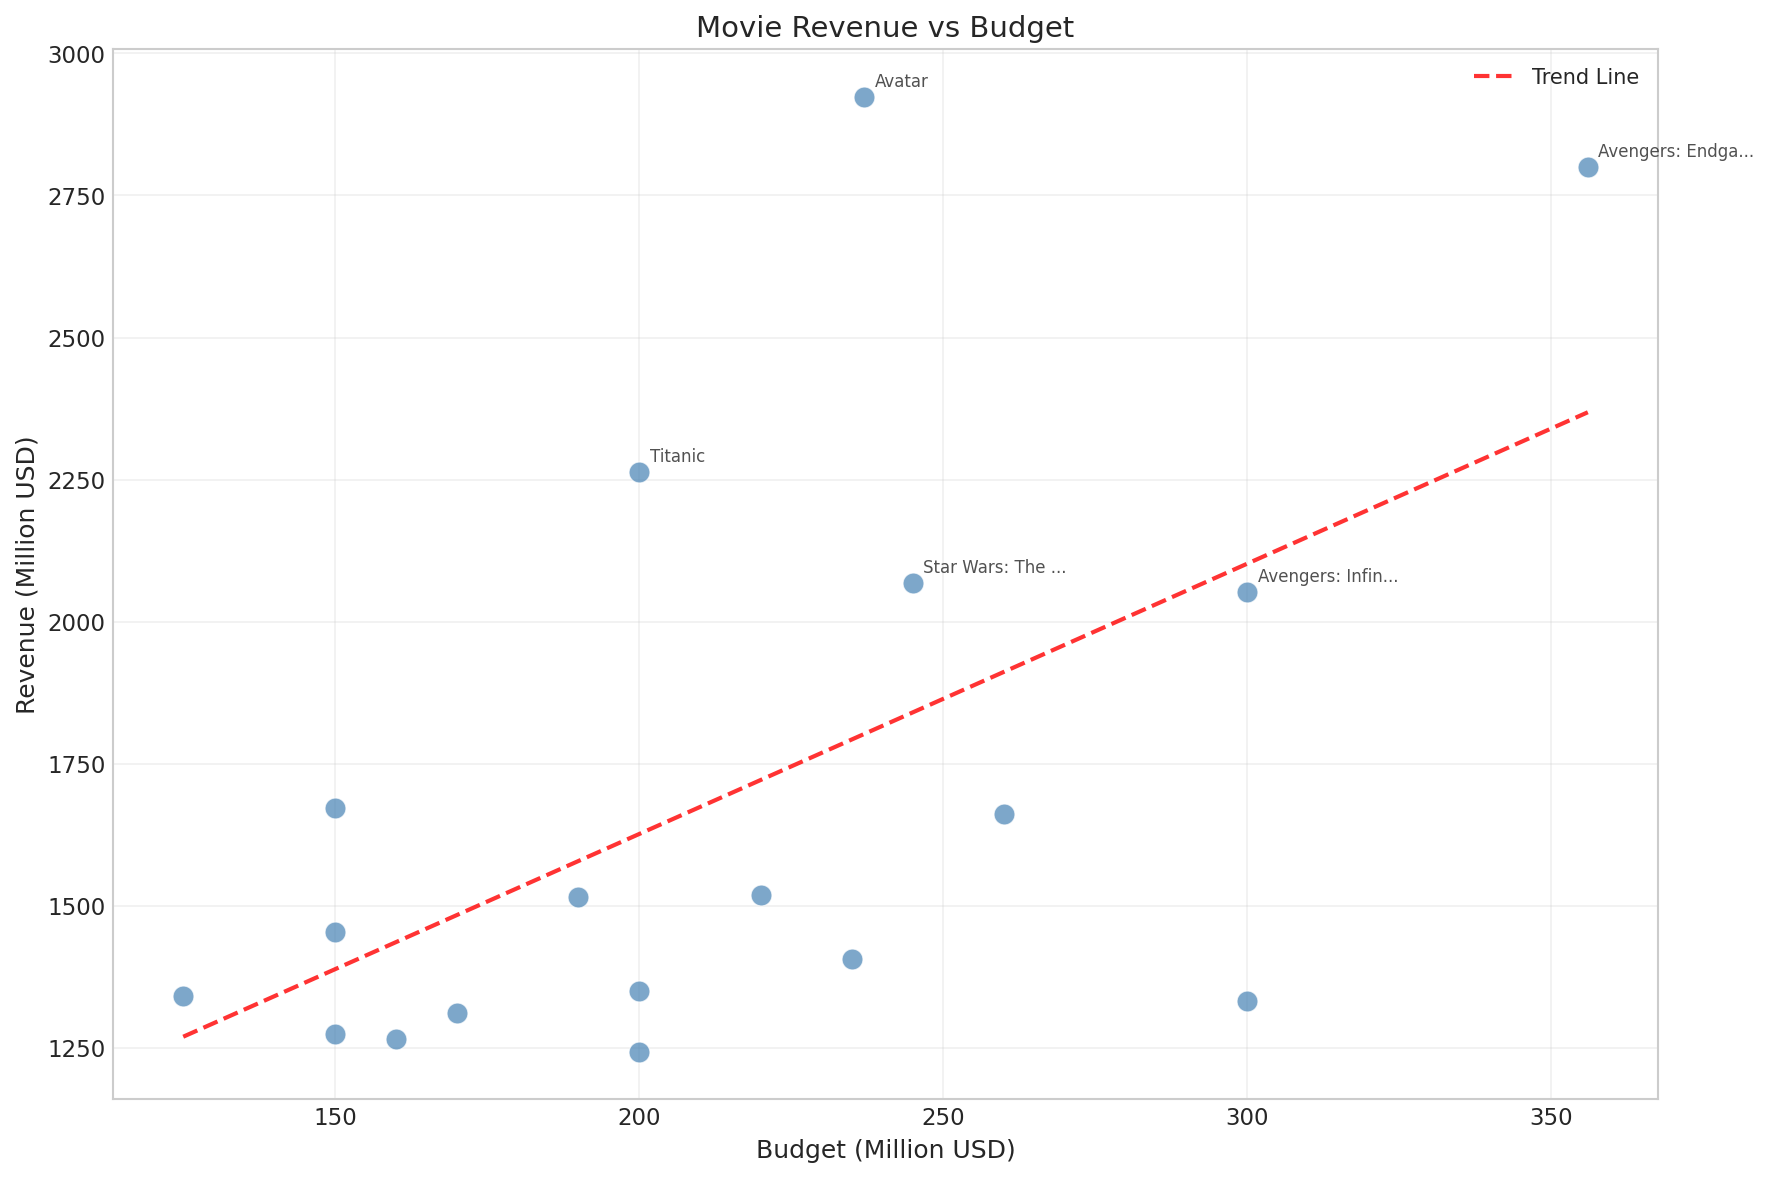


 Roi By Genre:


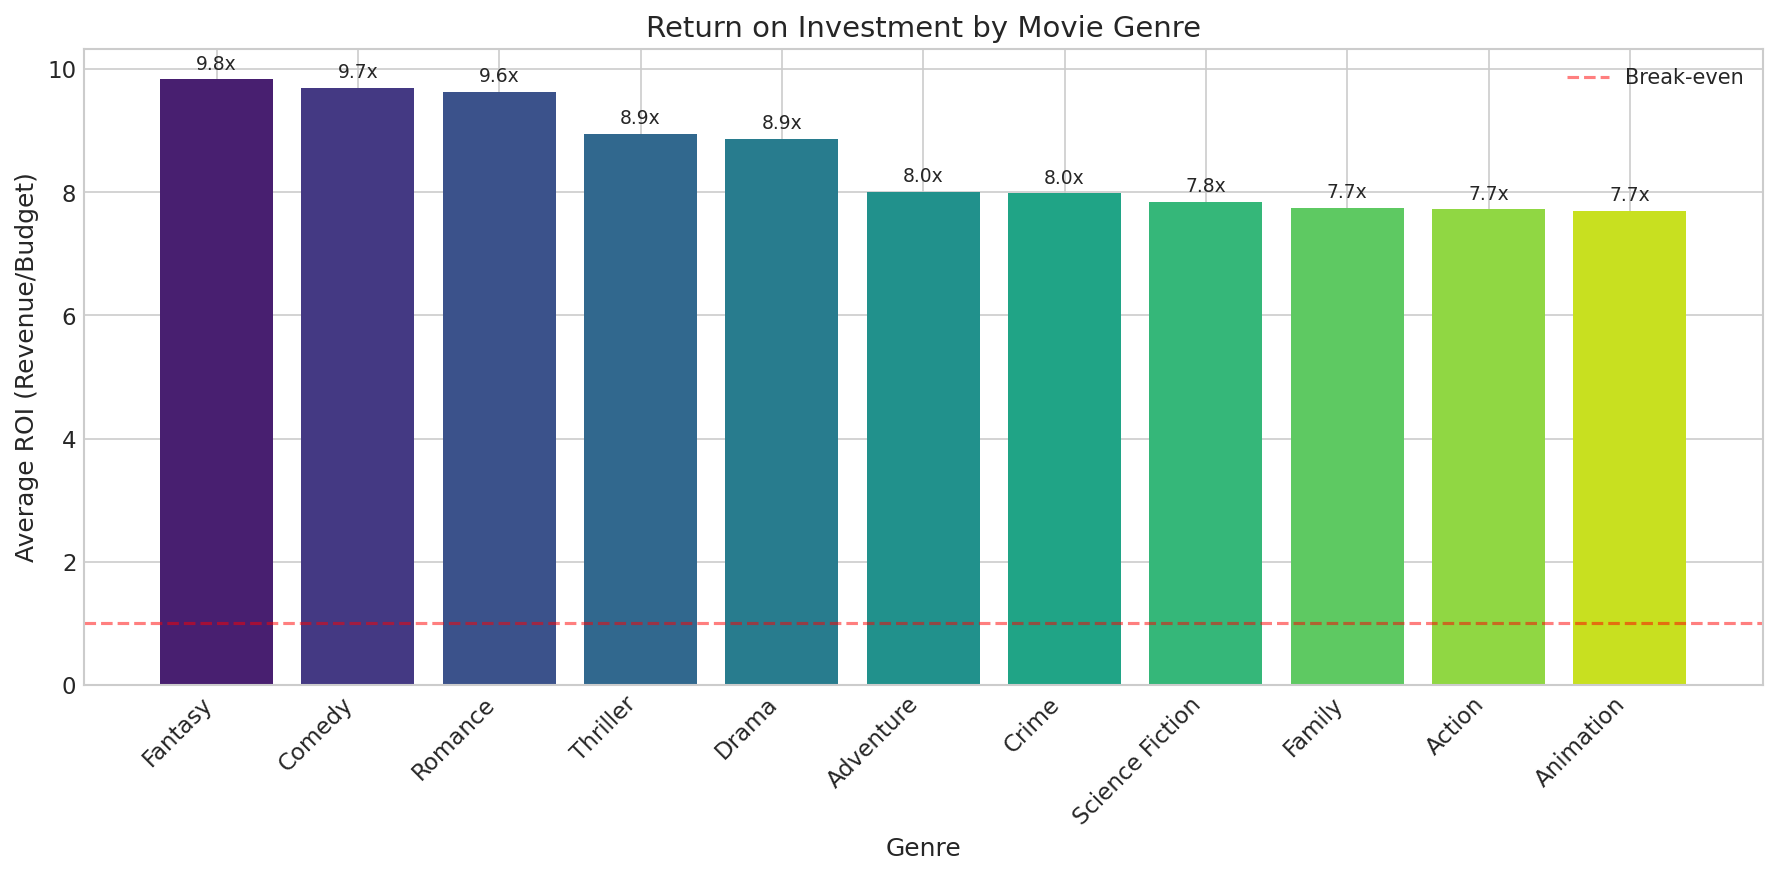


 Popularity Vs Rating:


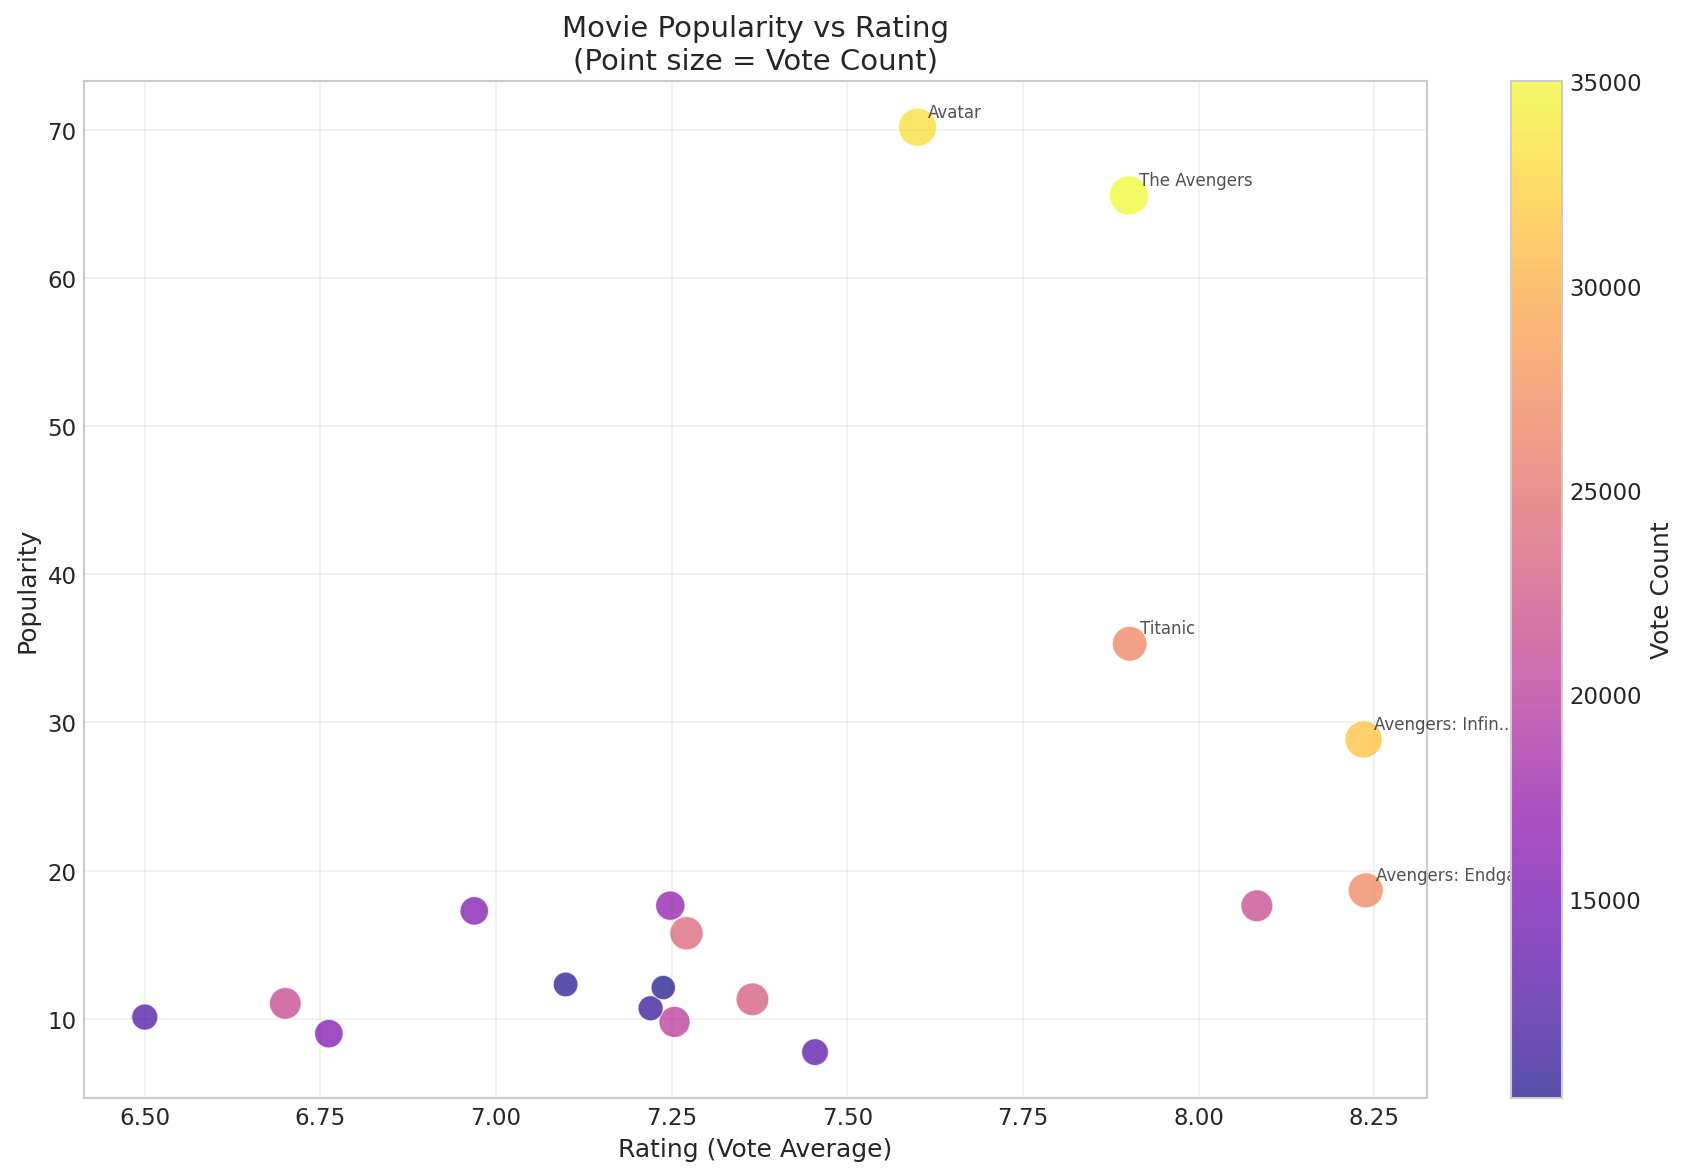


 Yearly Trends:


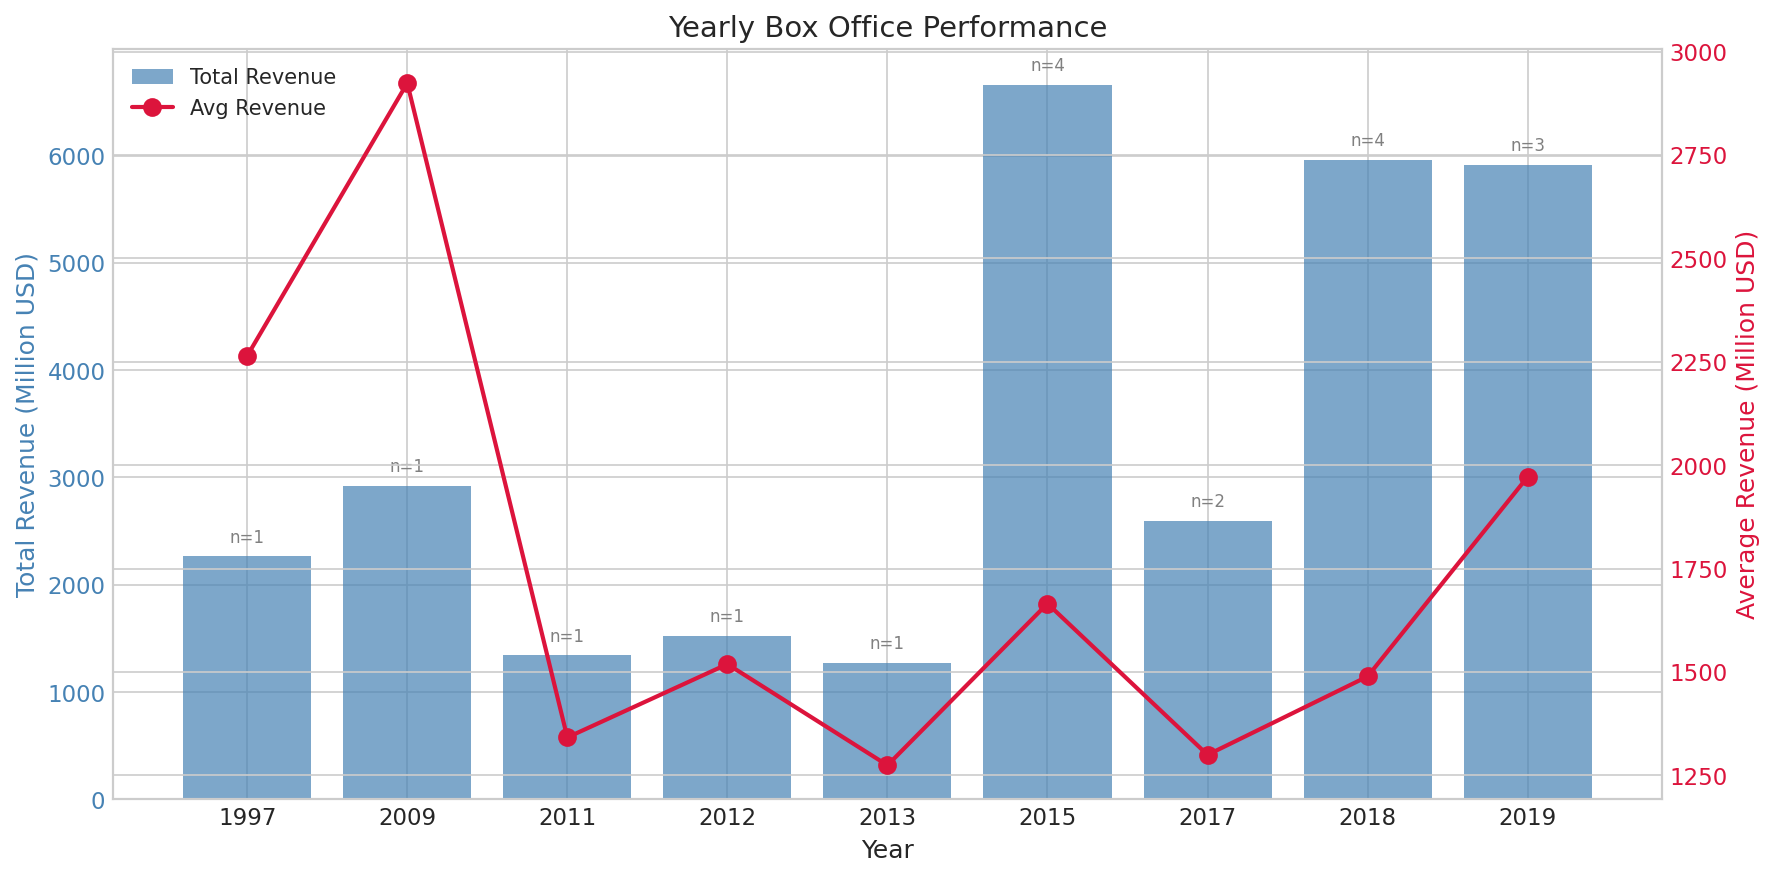


 Franchise Vs Standalone:


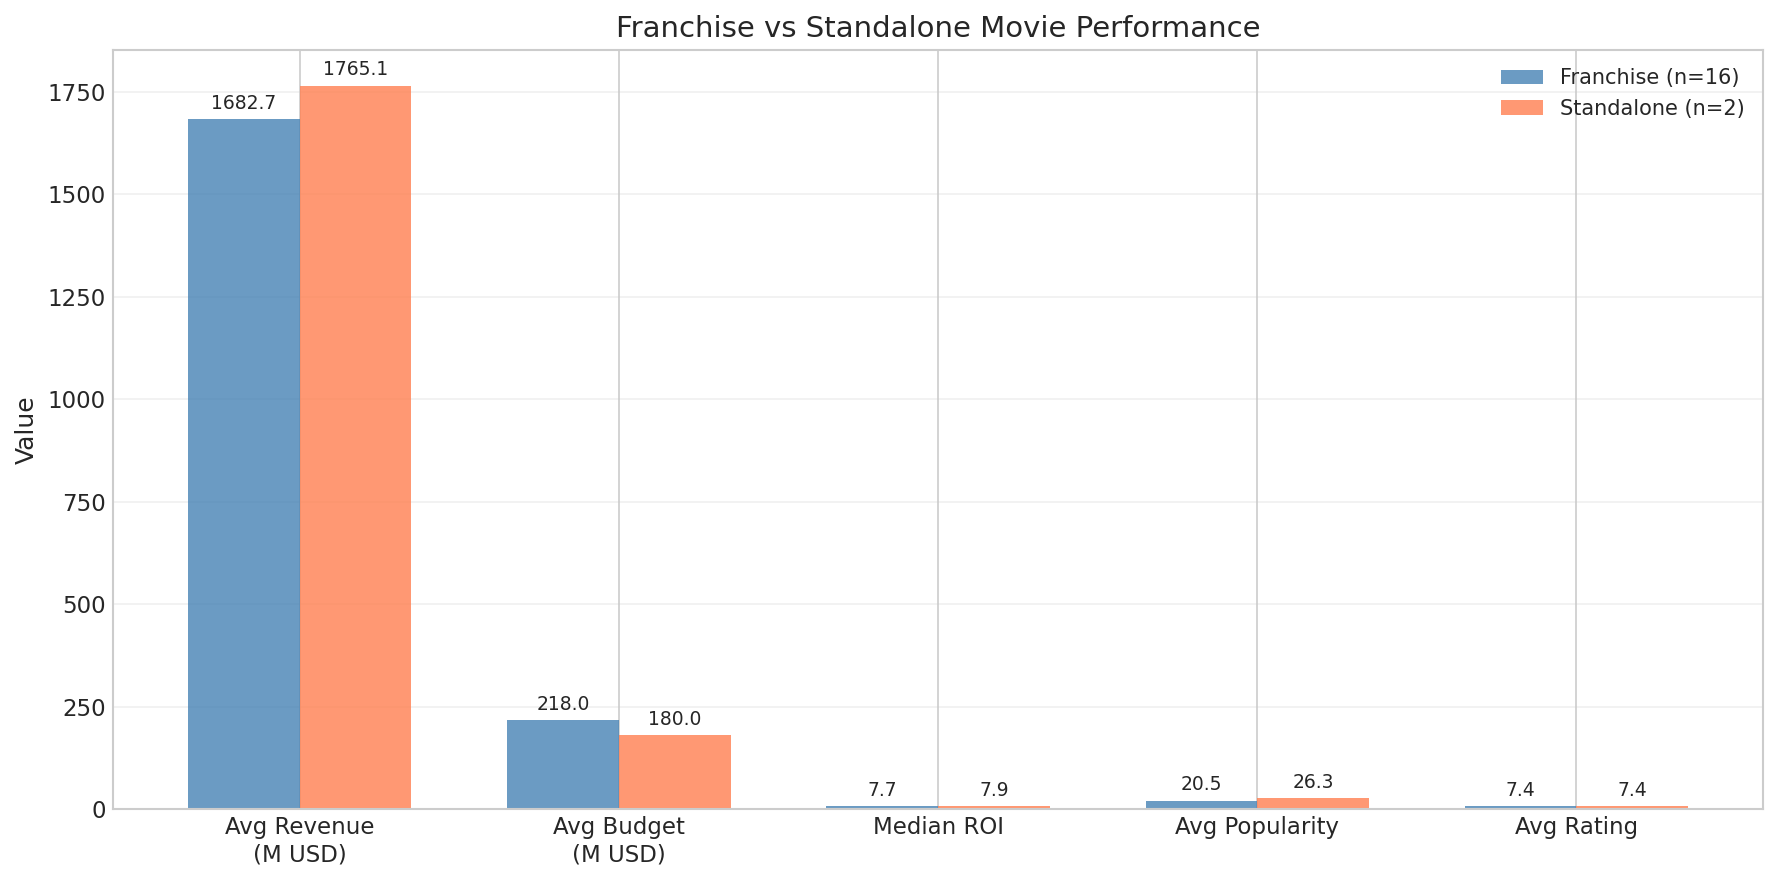

In [17]:
from IPython.display import Image, display

# Display saved visualizations
for name, path in viz_files.items():
    if os.path.exists(path):
        print(f"\n {name.replace('_', ' ').title()}:")
        display(Image(filename=path, width=800))

---
## Pipeline Summary

In [18]:
print("\n" + "="*60)
print("    PIPELINE COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"\n Results saved to: {OUTPUT_DIR}/")
print(f" Visualizations created: {len(viz_files)}")
print(f" Movies analyzed: {df.count()}")


    PIPELINE COMPLETED SUCCESSFULLY!

 Results saved to: output/
 Visualizations created: 5
 Movies analyzed: 18


---
## Cleanup

In [19]:
# Stop Spark session when done
spark.stop()
print(" Spark session stopped.")

 Spark session stopped.
